In [6]:
# Let's do some clustering to find patterns
# Player position analysis - create heatmap of starting positions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# load the data
df = pd.read_csv('aoe_data.csv')

# drop match uid -- not needed for analysis
df = df.drop(columns=['Unnamed: 0'])


In [7]:

# Scale the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(heatmap_df.fillna(50))

# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

NameError: name 'heatmap_df' is not defined

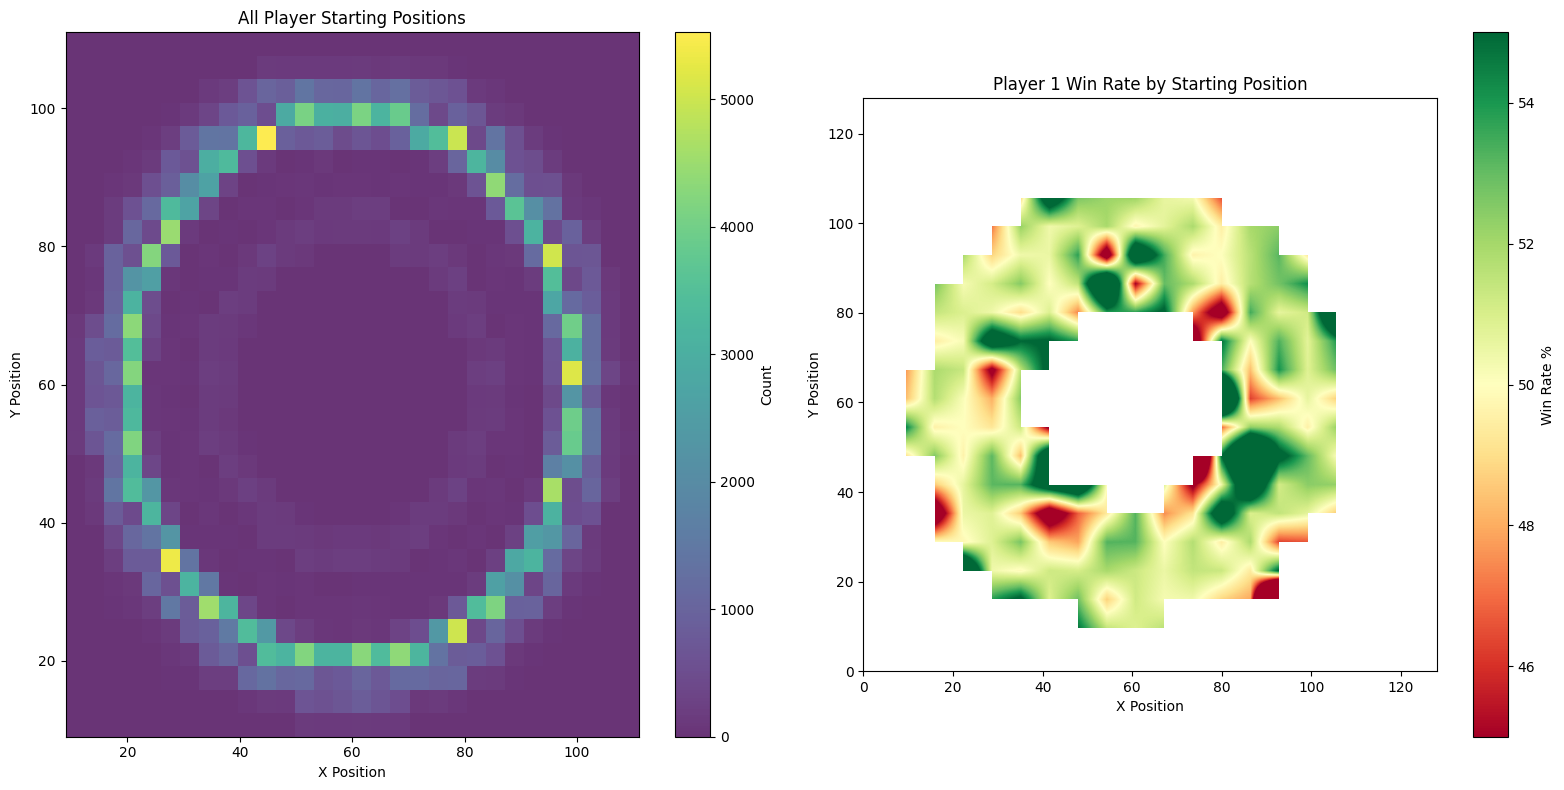

Position with highest P1 win rate: (76.8, 57.6) - 67.54%
Position with lowest P1 win rate: (89.6, 12.8) - 20.00%


In [8]:
# Make sure we're looking at positions with valid coordinates
position_data = df.dropna(subset=['p1_xpos', 'p1_ypos', 'p2_xpos', 'p2_ypos'])

# Set up the figure with subplots
plt.figure(figsize=(16, 8))

# Create a combined heatmap showing all player starting positions
plt.subplot(1, 2, 1)
# Combine all player positions into one dataset for density plotting
all_x = np.concatenate([position_data['p1_xpos'], position_data['p2_xpos']])
all_y = np.concatenate([position_data['p1_ypos'], position_data['p2_ypos']])
plt.hist2d(all_x, all_y, bins=30, cmap='viridis', alpha=0.8)
plt.colorbar(label='Count')
plt.title('All Player Starting Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Create a heatmap showing win rates by position
plt.subplot(1, 2, 2)
# Create a position grid for p1 and calculate win rates
pos_bins = 20
xbins = np.linspace(0, 128, pos_bins+1)
ybins = np.linspace(0, 128, pos_bins+1)

win_grid = np.zeros((pos_bins, pos_bins))
count_grid = np.zeros((pos_bins, pos_bins))

for _, row in position_data.iterrows():
    # Get position bin indexes
    x_bin = min(int(row['p1_xpos'] / 128 * pos_bins), pos_bins-1)
    y_bin = min(int(row['p1_ypos'] / 128 * pos_bins), pos_bins-1)
    
    # Increment count and win counters
    count_grid[y_bin, x_bin] += 1
    if row['winner'] == 1:  # If player 1 won
        win_grid[y_bin, x_bin] += 1

# Calculate win rates (avoid division by zero)
with np.errstate(divide='ignore', invalid='ignore'):
    win_rate_grid = np.divide(win_grid, count_grid) * 100
    win_rate_grid[count_grid < 20] = np.nan  # Mask positions with few games

# Plot the win rate heatmap
im = plt.imshow(win_rate_grid, cmap='RdYlGn', vmin=45, vmax=55, 
                extent=[0, 128, 0, 128], origin='lower', interpolation='bilinear')
plt.colorbar(im, label='Win Rate %')
plt.title('Player 1 Win Rate by Starting Position')
plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.tight_layout()
plt.show()

# Quick summary statistics
valid_positions = ~np.isnan(win_rate_grid)
if np.any(valid_positions):
    max_wr_pos = np.unravel_index(np.nanargmax(win_rate_grid), win_rate_grid.shape)
    min_wr_pos = np.unravel_index(np.nanargmin(win_rate_grid), win_rate_grid.shape)
    
    print(f"Position with highest P1 win rate: ({max_wr_pos[1]*128/pos_bins:.1f}, {max_wr_pos[0]*128/pos_bins:.1f}) - {np.nanmax(win_rate_grid):.2f}%")
    print(f"Position with lowest P1 win rate: ({min_wr_pos[1]*128/pos_bins:.1f}, {min_wr_pos[0]*128/pos_bins:.1f}) - {np.nanmin(win_rate_grid):.2f}%")